## Урок 7
### Многомерный статистический анализ. Линейная регрессия

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

#### Задача 1
Даны значения величины заработной платы заемщиков банка (`salary`) и значения их поведенческого кредитного скоринга (`scoring`):
```
salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]
```
Возьмём в качестве признака значение `salary`, а в качестве целевой переменной - `scoring`.

1. Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.
2. Постройте `scatter plot` по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.
3. Посчитайте коэффициент детерминации, среднюю ошибку аппроксимации.
4. Оцените построенное уравнение регрессии с помощью F-критерия Фишера.
5. Постройте для коэффициентов регрессии доверительные интервалы с помощью t-статистики Стьюдента.

##### Решение

In [2]:
salary = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
scoring = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [3]:
x = salary
y = scoring
n = salary.shape[0] # number of observations

Coefficients of the linear regression equation:
$$b1 = \frac{\overline{yx} - \overline{y} \cdot {\overline{x}}}{\overline{x^2} - (\overline{x})^2};$$

$$b0 = \overline{y} - b1 \cdot {\overline{x}}.$$

In [4]:
b1 = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x ** 2) - np.mean(x) ** 2)
b1

2.620538882402765

In [5]:
b0 = np.mean(y) - b1 * np.mean(x)
b0

444.1773573243596

Linear regression equation with `b0` and `b1` coefficients:
$$y = 444.18 + 2.62 \cdot x$$

In [6]:
salary.shape

(10,)

In [7]:
# Create a matrix with one column
x_mtrx = salary.reshape(-1, 1)
x_mtrx.shape

(10, 1)

In [8]:
# Create an extended matrix with an extra column filled with '1' values
ones = np.ones((x_mtrx.shape[0], 1)) # create matrix 'ones'
x_mtrx = np.hstack((ones, x_mtrx)) # concatenate 'ones' and 'x_mtrx'
x_mtrx.shape

(10, 2)

In [9]:
print("Matrix with salaries:\n", x_mtrx)

Matrix with salaries:
 [[  1.  35.]
 [  1.  45.]
 [  1. 190.]
 [  1. 200.]
 [  1.  40.]
 [  1.  70.]
 [  1.  54.]
 [  1. 150.]
 [  1. 120.]
 [  1. 110.]]


In [10]:
scoring.shape

(10,)

In [11]:
# Reshape the array to get a matrix with one column
y_mtrx = scoring.reshape(-1, 1)
y_mtrx.shape

(10, 1)

In [12]:
print("Matrix with scorings:\n", y_mtrx)

Matrix with scorings:
 [[401]
 [574]
 [874]
 [919]
 [459]
 [739]
 [653]
 [902]
 [746]
 [832]]


Coefficient `b` with method of least squares:
$$b = (X^\top \cdot X)^{-1} \cdot X^\top \cdot y$$


In [13]:
# Get transposed matrix XT multiplied by matrix X
XTX = x_mtrx.T.dot(x_mtrx)

np.linalg.det(XTX) # determinant of the result matrix XTX

349464.00000000023

In [14]:
# Invert transposed matrix
XTX_inv = np.linalg.inv(XTX)

# Get an array with b0 and b1 coefficients (by formula above)
b0b1 = XTX_inv.dot(x_mtrx.T).dot(y_mtrx)
b0b1

array([[444.17735732],
       [  2.62053888]])

Text(0, 0.5, 'Scoring')

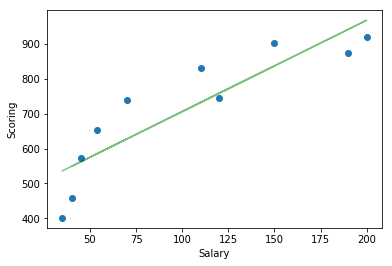

In [15]:
# Values (scatter plot) and linear regression function (green line)
ox = x
oy = b0 + b1 * ox

plt.scatter(x, y)
plt.plot(ox, oy, color='green', alpha=0.5)

plt.xlabel('Salary')
plt.ylabel('Scoring')

R^2 (coefficient of determination) regression score:
$$R^2 = \dfrac{D_{model}}{D_y}$$
where `D_model` is the variance of predicted values, `D_y` is the variance of fact values.

In [16]:
# Get an array of predicted values and compare it with an array of fact values
y_pred = b0 + b1 * x

print(f'fact: {y[:4]}')
print(f'pred: {y_pred[:4]}')

fact: [401 574 874 919]
pred: [535.89621821 562.10160703 942.07974498 968.2851338 ]


In [17]:
# Calculate R^2 score
R2 = y_pred.var() / y.var()
R2

0.7876386635293678

In [18]:
# Get correlation matrix using built-in function
corr_matrix = np.corrcoef(x, y)

# Get unbiased Pearson correlation coefficient from correlation matrix
corr = corr_matrix[0, 1]

# Calculate coefficient of determination as a square of correlation coefficient
R2 = corr ** 2
R2

0.7876386635293682

Approximation error (ideally, should not exceed 10%):
$$\overline{A} = \frac{1}{n} \displaystyle\sum_{i=1}^{n} \Bigl| {{\frac{y_i - z_i}{y_i}} \Bigr|}$$

In [19]:
# Calculate approximation error
mean_appr_error = np.mean(np.abs((y - y_pred) / y))
mean_appr_error

0.11469251843561709

Statistics for Fisher criterion (F-criterion):
$$T = \dfrac{R^2}{1 - R^2} \cdot \dfrac{f_2}{f_1},$$
where  
$k$ is the number of features,  
$n$ is the number of observations,  
$f_1 = k$,  
$f_2 = n - k - 1$  

In [20]:
k = x.ndim
f1 = k
f2 = n - k - 1

k, n, f1, f2

(1, 10, 1, 8)

In [21]:
# Calculate F-criterion
F_fact = (R2 / (1 - R2)) * (f2 / f1)
F_fact

29.671640859664432

In [22]:
# Calculate reference F-criterion using built-in function

alpha = 0.05 # significance level

F = stats.f.ppf(1 - alpha, f1, f2)
F

5.317655071578714

In [23]:
F_fact > F

True

Based on F-criterion, the regression equation is statistically significant.

In [24]:
def standard_error_slope(
        x: np.ndarray,
        y: np.ndarray,
        z: np.ndarray,
) -> float:
    """Стандартная ошибка коэффициента наклона.
    """
    
    n = x.shape[0]
    
    upper = ((y - z) ** 2).sum() / (n - 2)
    lower = ((x - x.mean()) ** 2).sum()
    
    return np.sqrt(upper / lower)

In [25]:
s_slope = standard_error_slope(x, y, y_pred)
s_slope

0.48108279568516005

In [26]:
# Calculate quantile for t-distribution (Student's coefficient)
# df = n - 2 for slope coefficient
t = stats.t.ppf(1 - alpha / 2, df = n - 2)
t

2.3060041350333704

In [27]:
# Calculate confidence interval for b1
ci_from = b1 - t * s_slope
ci_to = b1 + t * s_slope

(ci_from, ci_to)

(1.5111599662593718, 3.729917798546158)

In [28]:
def standard_error_intercept(
        x: np.ndarray,
        y: np.ndarray,
        z: np.ndarray,
) -> float:
    """Стандартная ошибка коэффициента сдвига.
    """
    
    return standard_error_slope(x, y, z) * np.sqrt((x ** 2).mean())

In [29]:
s_intercept = standard_error_intercept(x, y, y_pred)
s_intercept

56.46649755068153

In [30]:
# Calculate confidence interval for b0
ci_from = b0 - t * s_intercept
ci_to = b0 + t * s_intercept

(ci_from, ci_to)

(313.9653804816363, 574.3893341670829)

#### Задача 2
Посчитать коэффициенты линейной регрессии для т.н. Квартета Энскомба (см. урок 6).

##### Решение

In [31]:
anscombe = pd.read_csv('../../datasets/anscombe_dataset.csv')
anscombe.head(10)

,id,x1,y1,x2,y2,x3,y3,x4,y4
0,0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
5,5,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
6,6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
7,7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
8,8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56
9,9,7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91


Dataset 1: b0 = 3.0000909090909245, b1 = 0.5000909090909076
Dataset 2: b0 = 3.000909090909091, b1 = 0.5
Dataset 3: b0 = 3.0024545454545697, b1 = 0.49972727272727013
Dataset 4: b0 = 3.0017272727272584, b1 = 0.4999090909090924


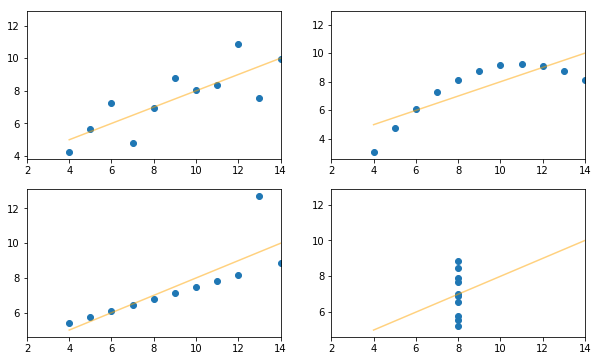

In [32]:
# Original code was provided by Yury (supervisor).
# Applied minor changes and added comments.

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(10, 6)

ox = np.linspace(4, 19, 100)

# For each of the four datasets:
# - calculate and print coefficients of the linear regression; 
# - add dataset values (scatter plot) and linear regression function (orange line).

for i, ax in enumerate(axes.flatten()):
    i += 1    
    xn = f'x{i}'
    yn = f'y{i}'
    
    x = anscombe[xn]
    y = anscombe[yn]
    
    # Coefficients of the linear regression
    b1 = ((x * y).mean() - x.mean() * y.mean()) / ((x ** 2).mean() - x.mean() ** 2)
    b0 = y.mean() - b1 * x.mean()
    
    print(f'Dataset {i}: b0 = {b0}, b1 = {b1}')
    
    oy = b0 + b1 * ox
    
    ax.scatter(x, y)
    ax.plot(ox, oy, color='orange', alpha = 0.5)
    
    ax.set_xlim(4, 16)
    ax.set_xlim(2, 14)